Plot Network Topology

In [1]:
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
import re
import os
import sys



Check solar irradiation

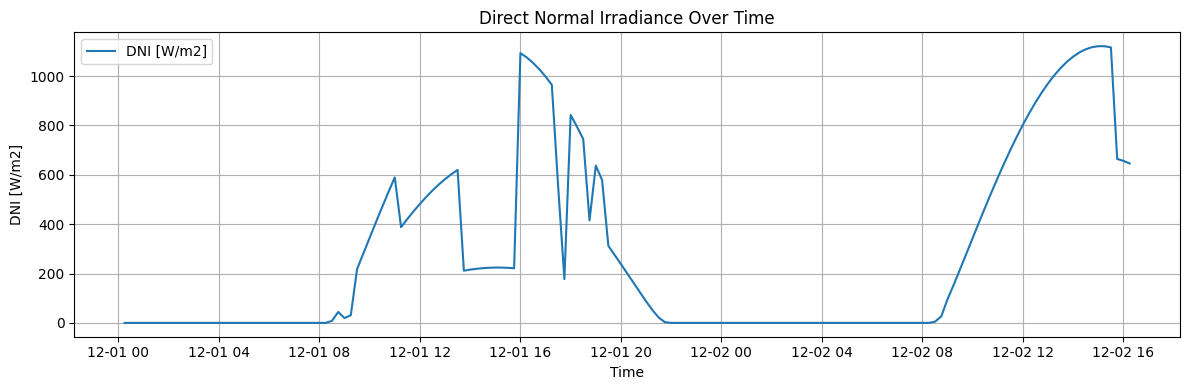

In [2]:
# Plot the solar irradiation as a function of time
df = pd.read_csv('results.csv', parse_dates=['date'], index_col='date')

dni_col = 'SolarIrradiation-0.SolarIrradiation_0-DNI[W/m2]'
if dni_col in df.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[dni_col], label='DNI [W/m2]')
    plt.xlabel('Time')
    plt.ylabel('DNI [W/m2]')
    plt.title('Direct Normal Irradiance Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{dni_col}' not found in results.csv")

Tensão nas barras

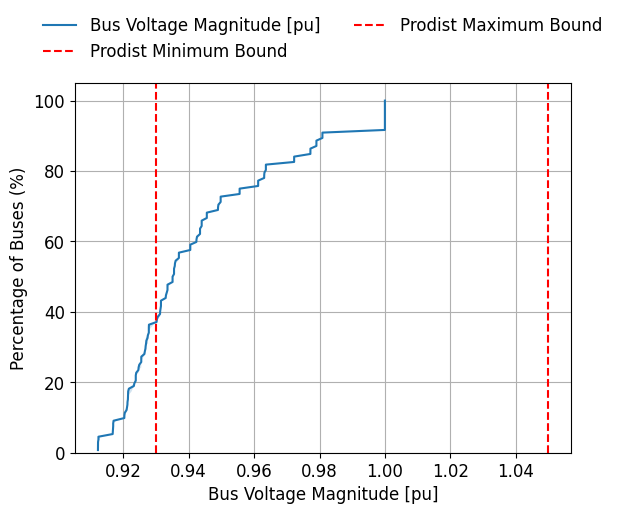

In [3]:
# Função para plotar CDF com sombra
def plot_cdf_with_shadow(data_mean, data_hi, data_lo, label):
    sorted_data_mean = np.sort(data_mean)
    #cdf = 100*np.arange(len(sorted_data_mean)) / float(len(sorted_data_mean))
    cdf = np.arange(1, len(sorted_data_mean) + 1) / len(sorted_data_mean) * 100

    
    sorted_data_hi = np.sort(data_hi)
    sorted_data_lo = np.sort(data_lo)
    
    plt.plot(sorted_data_mean, cdf, label=label)
    plt.fill_betweenx(cdf, sorted_data_lo, sorted_data_hi, alpha=0.2)


# Read the CSV file
df = pd.read_csv('results.csv', parse_dates=['date'], index_col='date')

# Filter columns that match the Bus voltage magnitude pattern
voltage_columns = [col for col in df.columns if re.search(r"Bus-\d+-Vm_[a|b|c]\[pu\]$", col)]
voltage_df = df[voltage_columns]

# Calculate statistics
stats_df = pd.DataFrame({
    'Average': voltage_df.mean(),
    'Max': voltage_df.max(),
    'Min': voltage_df.min()
})


# Extract each column as vectors
average_vector = stats_df['Average'].values  # as NumPy array
max_vector = stats_df['Max'].values         # as NumPy array
min_vector = stats_df['Min'].values         # as NumPy array

plot_cdf_with_shadow(average_vector, max_vector, min_vector, 'Bus Voltage Magnitude [pu]')

plt.xlabel('Bus Voltage Magnitude [pu]', fontsize=12)
plt.ylabel('Percentage of Buses (%)', fontsize=12)
plt.xticks(fontsize=12)                                    # Tamanho dos números no eixo X
plt.yticks(fontsize=12)                                    # Tamanho dos números no eixo Y
#plt.legend(fontsize=12, loc='best', fontsize=12)
#plt.xlim(10, 52)
plt.ylim(0, None)
plt.grid(True)
plt.axvline(x=0.93, color='red', linestyle='--', linewidth=1.5, label='Prodist Minimum Bound')
plt.axvline(x=1.05, color='red', linestyle='--', linewidth=1.5, label='Prodist Maximum Bound')
#plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1.22), fontsize=12)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), fontsize=12, ncol=2, frameon=False)
plt.show()



Perda de potência ativa nas barras

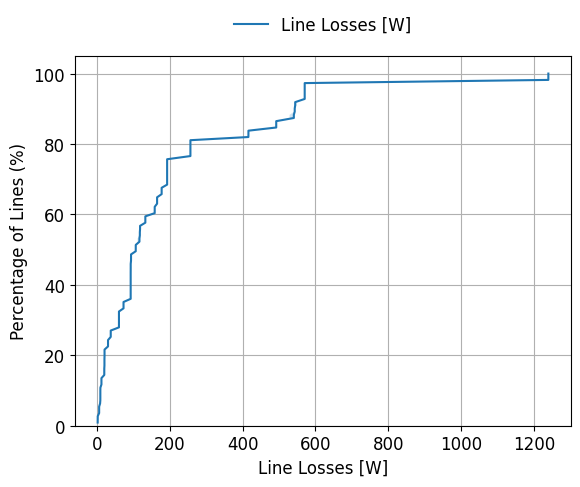

In [4]:

# Filter columns that match the Bus voltage magnitude pattern
loss_columns = [col for col in df.columns if re.search(r"Line-\d+-Pl_[a|b|c]\[MW\]$", col)]
loss_df = df[loss_columns]*1e6

# Calculate statistics
stats_df = pd.DataFrame({
    'Average': loss_df.mean(),
    'Max': loss_df.max(),
    'Min': loss_df.min()
})

# Extract each column as vectors
average_vector = stats_df['Average'].values  # as NumPy array
max_vector = stats_df['Max'].values         # as NumPy array
min_vector = stats_df['Min'].values         # as NumPy array

plot_cdf_with_shadow(average_vector, max_vector, min_vector, 'Line Losses [W]')

plt.xlabel('Line Losses [W]', fontsize=12)
plt.ylabel('Percentage of Lines (%)', fontsize=12)
plt.xticks(fontsize=12)                                    # Tamanho dos números no eixo X
plt.yticks(fontsize=12)                                    # Tamanho dos números no eixo Y
#plt.legend(fontsize=12, loc='best', fontsize=12)
#plt.xlim(10, 52)
plt.ylim(0, None)
plt.grid(True)
#plt.axvline(x=0.93, color='red', linestyle='--', linewidth=1.5, label='Prodist Minimum Bound')
#plt.axvline(x=1.05, color='red', linestyle='--', linewidth=1.5, label='Prodist Maximum Bound')
#plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1.22), fontsize=12)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), fontsize=12, ncol=2, frameon=False)
plt.show()



Corrente de Neutro

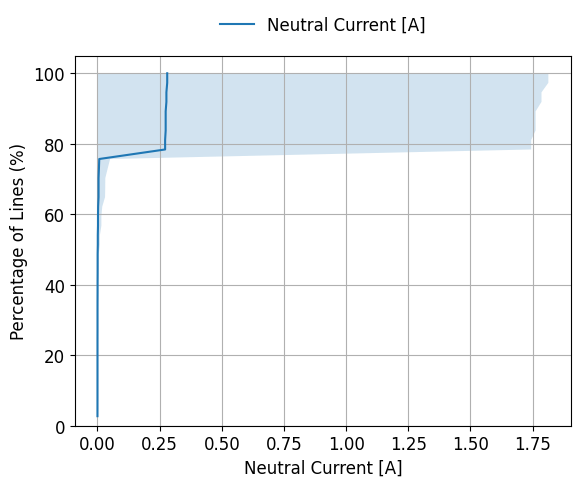

In [8]:
# Filter columns that match the Bus voltage magnitude pattern
neutral_current_columns = [col for col in df.columns if re.search(r"Line-\d+-I_n_from\[kA\]$", col)]
neutral_current_df = df[neutral_current_columns]*1e3

# Calculate statistics
stats_df = pd.DataFrame({
    'Average': neutral_current_df.mean(),
    'Max': neutral_current_df.max(),
    'Min': neutral_current_df.min()
})

# Extract each column as vectors
average_vector = stats_df['Average'].values  # as NumPy array
max_vector = stats_df['Max'].values         # as NumPy array
min_vector = stats_df['Min'].values         # as NumPy array

plot_cdf_with_shadow(average_vector, max_vector, min_vector, 'Neutral Current [A]')

plt.xlabel('Neutral Current [A]', fontsize=12)
plt.ylabel('Percentage of Lines (%)', fontsize=12)
plt.xticks(fontsize=12)                                    # Tamanho dos números no eixo X
plt.yticks(fontsize=12)                                    # Tamanho dos números no eixo Y
#plt.legend(fontsize=12, loc='best', fontsize=12)
#plt.xlim(10, 52)
plt.ylim(0, None)
plt.grid(True)
#plt.axvline(x=0.93, color='red', linestyle='--', linewidth=1.5, label='Prodist Minimum Bound')
#plt.axvline(x=1.05, color='red', linestyle='--', linewidth=1.5, label='Prodist Maximum Bound')
#plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1.22), fontsize=12)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), fontsize=12, ncol=2, frameon=False)
plt.show()

Line Loading

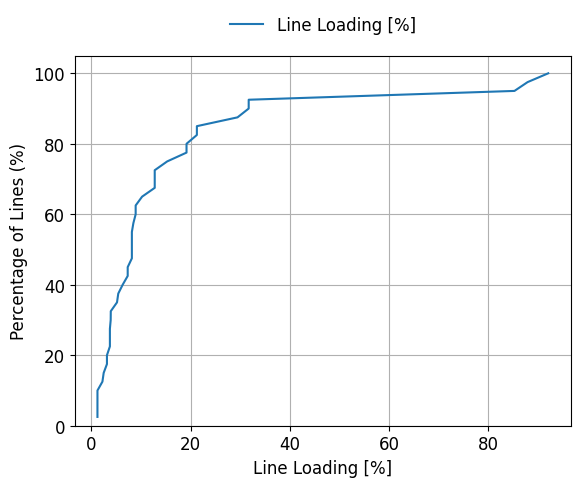

In [9]:
# Filter columns that match the Bus voltage magnitude pattern
line_loading_columns = [col for col in df.columns if re.search(r"Loading\[%\]$", col)]
line_loading_df = df[line_loading_columns]

# Calculate statistics
stats_df = pd.DataFrame({
    'Average': line_loading_df.mean(),
    'Max': line_loading_df.max(),
    'Min': line_loading_df.min()
})

# Extract each column as vectors
average_vector = stats_df['Average'].values  # as NumPy array
max_vector = stats_df['Max'].values         # as NumPy array
min_vector = stats_df['Min'].values         # as NumPy array

plot_cdf_with_shadow(average_vector, max_vector, min_vector, 'Line Loading [%]')

plt.xlabel('Line Loading [%]', fontsize=12)
plt.ylabel('Percentage of Lines (%)', fontsize=12)
plt.xticks(fontsize=12)                                    # Tamanho dos números no eixo X
plt.yticks(fontsize=12)                                    # Tamanho dos números no eixo Y
#plt.legend(fontsize=12, loc='best', fontsize=12)
#plt.xlim(10, 52)
plt.ylim(0, None)
plt.grid(True)
#plt.axvline(x=0.93, color='red', linestyle='--', linewidth=1.5, label='Prodist Minimum Bound')
#plt.axvline(x=1.05, color='red', linestyle='--', linewidth=1.5, label='Prodist Maximum Bound')
#plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1.22), fontsize=12)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), fontsize=12, ncol=2, frameon=False)
plt.show()

Desbalanceamento de Barramentos

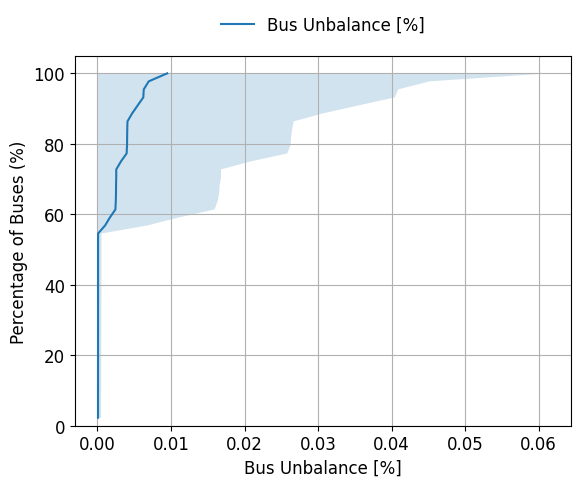

In [10]:

# Filter columns that match the Bus voltage magnitude pattern
unbalance_columns = [col for col in df.columns if re.search(r"Bus-\d+-Unbalance\[%\]$", col)]
unbalance_df = df[unbalance_columns]

# Calculate statistics
stats_df = pd.DataFrame({
    'Average': unbalance_df.mean(),
    'Max': unbalance_df.max(),
    'Min': unbalance_df.min()
})

# Extract each column as vectors
average_vector = stats_df['Average'].values  # as NumPy array
max_vector = stats_df['Max'].values         # as NumPy array
min_vector = stats_df['Min'].values         # as NumPy array

plot_cdf_with_shadow(average_vector, max_vector, min_vector, 'Bus Unbalance [%]')

plt.xlabel('Bus Unbalance [%]', fontsize=12)
plt.ylabel('Percentage of Buses (%)', fontsize=12)
plt.xticks(fontsize=12)                                    # Tamanho dos números no eixo X
plt.yticks(fontsize=12)                                    # Tamanho dos números no eixo Y
#plt.legend(fontsize=12, loc='best', fontsize=12)
#plt.xlim(10, 52)
plt.ylim(0, None)
plt.grid(True)
#plt.axvline(x=0.93, color='red', linestyle='--', linewidth=1.5, label='Prodist Minimum Bound')
#plt.axvline(x=1.05, color='red', linestyle='--', linewidth=1.5, label='Prodist Maximum Bound')
#plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1.22), fontsize=12)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), fontsize=12, ncol=2, frameon=False)
plt.show()



Total Power

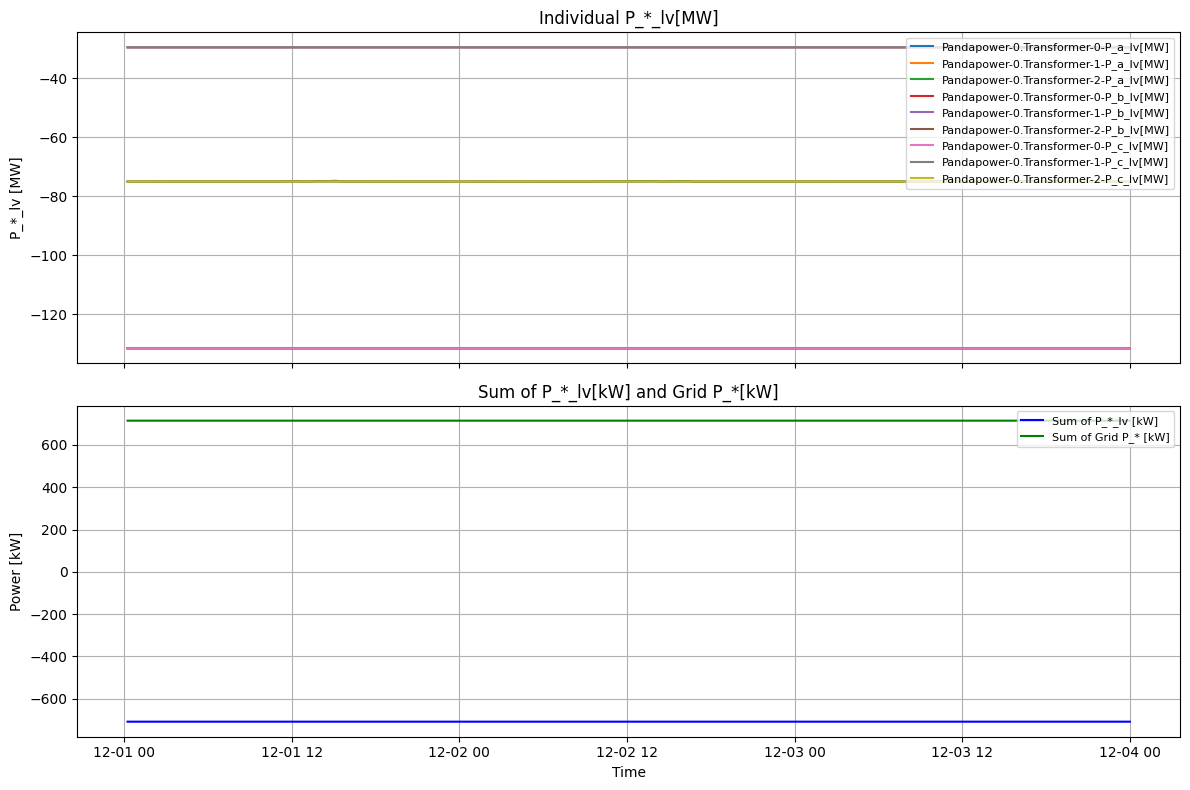

In [16]:
# Filter columns for P_*_hv[MW] and P_*[MW]
p_hv_columns = [col for col in df.columns if re.search(r"Pandapower-0.Transformer-\d+-P_[a|b|c]_lv\[MW\]$", col)]
p_grid_columns = [col for col in df.columns if re.search(r"Pandapower-0.ExternalGrid-\d+-P_[a|b|c]\[MW\]$", col)]

# DataFrames for the filtered columns
p_hv_df = df[p_hv_columns]
p_grid_df = df[p_grid_columns]

# Calculate the sum of P_*_hv[MW] and P_*[MW]
p_hv_sum = p_hv_df.sum(axis=1)
p_grid_sum = p_grid_df.sum(axis=1)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot: Plot every P_*_hv[MW]
for col in p_hv_columns:
    axes[0].plot(df.index, df[col]*1000, label=col)
axes[0].set_ylabel('P_*_lv [MW]')
axes[0].set_title('Individual P_*_lv[MW]')
axes[0].legend(loc='upper right', fontsize=8)
axes[0].grid(True)

# Second subplot: Plot the sum of P_*_hv[MW] and grid P_*[MW]
axes[1].plot(df.index, p_hv_sum*1000, label='Sum of P_*_lv [kW]', color='blue')
axes[1].plot(df.index, p_grid_sum*1000, label='Sum of Grid P_* [kW]', color='green')
axes[1].set_ylabel('Power [kW]')
axes[1].set_title('Sum of P_*_lv[kW] and Grid P_*[kW]')
axes[1].legend(loc='upper right', fontsize=8)
axes[1].grid(True)

# Finalize plot
plt.xlabel('Time')
plt.tight_layout()
plt.show()

Test power consumption data

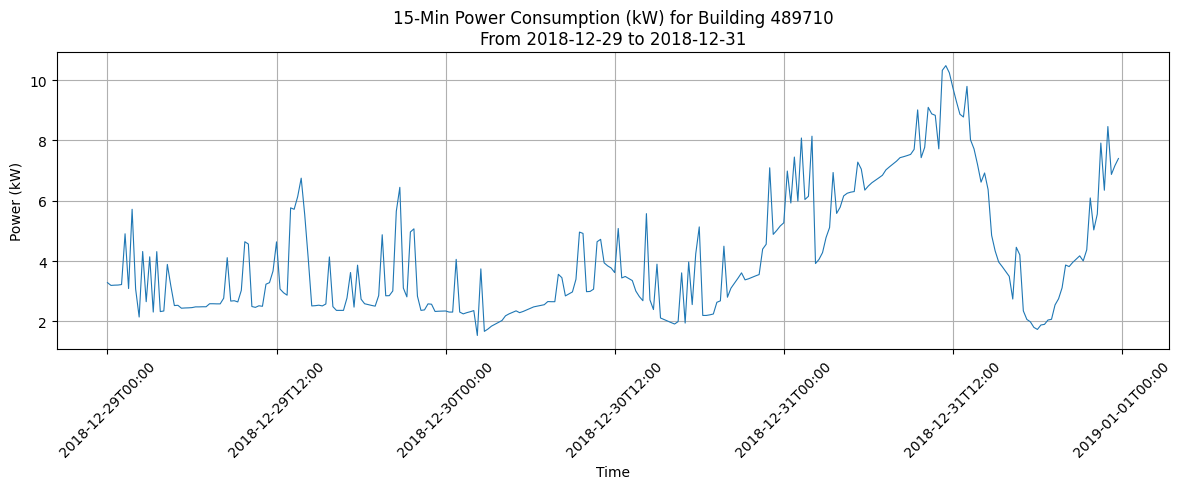

In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import timedelta
import matplotlib.dates as mdates

def plot_random_power_15min(bldg_id: int, num_days: int):
    # Connection config
    conn = psycopg2.connect(
        dbname="duilio",
        user="root",
        password="skamasfrevrest",
        host="103.0.1.37",
        port=5433  # or your port
    )
    cursor = conn.cursor()

    # Step 1: Get available daily buckets using TimescaleDB's time_bucket
    cursor.execute("""
        SELECT DISTINCT time_bucket('1 day', sample_time) AS day
        FROM building_power.building_power
        WHERE bldg_id = %s
        ORDER BY day
    """, (bldg_id,))
    days = [row[0] for row in cursor.fetchall()]
    
    if len(days) < num_days:
        print(f"Not enough days available (found {len(days)}, need {num_days}).")
        conn.close()
        return

    # Step 2: Pick a random start day
    start_idx = random.randint(0, len(days) - num_days)
    start_day = days[start_idx]
    end_day = start_day + timedelta(days=num_days)

    # Step 3: Fetch 15-min data for that period
    cursor.execute("""
        SELECT sample_time, electricity_total_energy_consumption / 0.25 AS power_kw
        FROM building_power.building_power
        WHERE bldg_id = %s
          AND sample_time >= %s
          AND sample_time < %s
          AND electricity_total_energy_consumption IS NOT NULL
        ORDER BY sample_time
    """, (bldg_id, start_day, end_day))
    rows = cursor.fetchall()
    conn.close()

    if not rows:
        print("No data found in selected time range.")
        return

    # Step 4: Plot
    df = pd.DataFrame(rows, columns=["sample_time", "power_kw"])
    df["sample_time"] = pd.to_datetime(df["sample_time"])

    plt.figure(figsize=(12, 5))
    plt.plot(df["sample_time"], df["power_kw"], linewidth=0.8)
    plt.title(f"15-Min Power Consumption (kW) for Building {bldg_id}\nFrom {start_day.date()} to {(end_day - timedelta(days=1)).date()}")
    plt.xlabel("Time")
    plt.ylabel("Power (kW)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%dT%H:%M'))
    plt.tight_layout()
    plt.show()

# Example usage:
plot_random_power_15min(bldg_id=489710, num_days=3)


CDF das potências do banco de dados


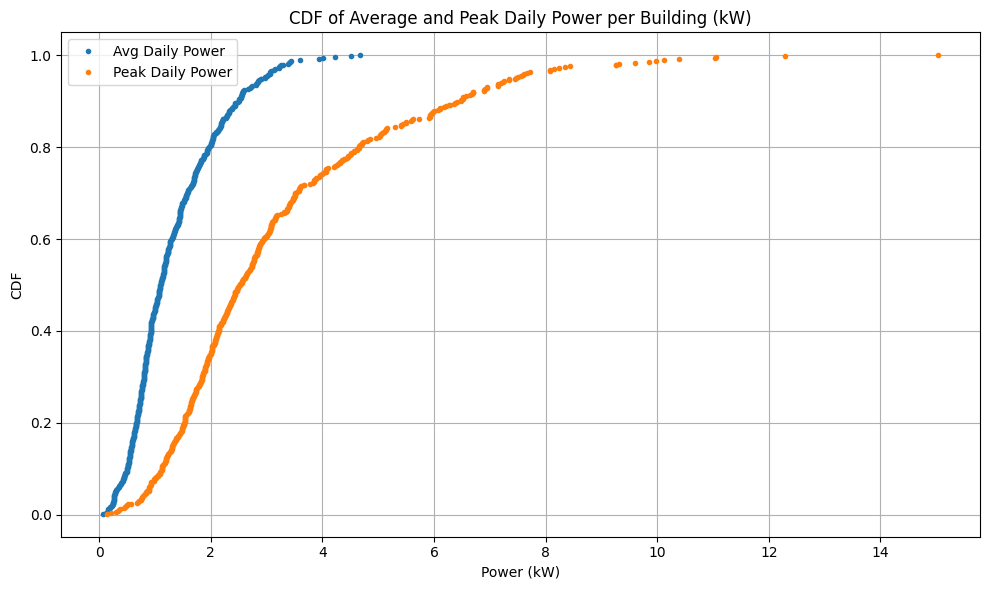

In [7]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_cdf_avg_power():
    # Connect to the database
    conn = psycopg2.connect(
        dbname="duilio",
        user="root",
        password="skamasfrevrest",
        host="103.0.1.37",
        port=5433  # or your port
    )
    cursor = conn.cursor()

    # Step 1: Query average daily energy per building
    cursor.execute("""
        SELECT 
        bldg_id,
        AVG(electricity_total_energy_consumption) / 24.0 AS avg_daily_power_kw,
        MAX(electricity_total_energy_consumption) / 24.0 AS peak_daily_power_kw
        FROM building_power.daily_energy
        WHERE electricity_total_energy_consumption IS NOT NULL
        GROUP BY bldg_id;
    """)
    rows = cursor.fetchall()
    conn.close()

    if not rows:
        print("No data returned.")
        return

    # Step 2: Convert to DataFrame
    df = pd.DataFrame(rows, columns=["bldg_id", "avg_daily_power_kw", "peak_daily_power_kw"])

    # Step 3: Prepare data for CDF
    sorted_avg = np.sort(df["avg_daily_power_kw"])
    cdf_avg = np.arange(1, len(sorted_avg) + 1) / len(sorted_avg)

    sorted_peak = np.sort(df["peak_daily_power_kw"].dropna())
    cdf_peak = np.arange(1, len(sorted_peak) + 1) / len(sorted_peak)

    # Step 2: Plot both CDFs
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_avg, cdf_avg, marker='.', linestyle='none', label="Avg Daily Power")
    plt.plot(sorted_peak, cdf_peak, marker='.', linestyle='none', label="Peak Daily Power")
    plt.title("CDF of Average and Peak Daily Power per Building (kW)")
    plt.xlabel("Power (kW)")
    plt.ylabel("CDF")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_cdf_avg_power()
